<a href="https://colab.research.google.com/github/LeeSeungYun1020/Introduction_To_Data_Science/blob/master/classroom/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip uninstall numpy -y
# !pip install -U numpy

# !pip uninstall pandas -y
# !pip install -U pandas

# !pip uninstall scipy -y
# !pip install -U scipy

# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn

# !pip uninstall statsmodels -y
# !pip install -U statsmodels

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
import matplotlib.pyplot as plt


# Simple linear regression

## 데이터 준비

In [ ]:
url = "https://raw.githubusercontent.com/LeeSeungYun1020/Introduction_To_Data_Science/master/data/datum.csv"
data = pd.read_csv(url)
data.head()

,id,name,friends,minutes
0,0,Hero,70,175
1,1,Dunn,65,170
2,2,Sue,72,205
3,3,Chi,63,120
4,4,Thor,71,220


In [ ]:
x = data[["friends"]]
y = data["minutes"]
x

,friends
0,70
1,65
2,72
3,63
4,71
5,64
6,60
7,64
8,67
9,69


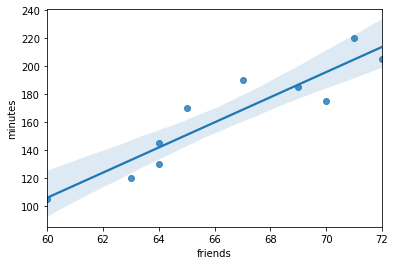

In [ ]:
sns.regplot(x="friends", y="minutes", data=data[["friends", "minutes"]])
plt.show()

## 모델 선택

In [ ]:
model = linear_model.LinearRegression()

## 모델 학습

In [ ]:
model.fit(x, y)
print("Intercept:", model.intercept_, ", Coef:", model.coef_)

Intercept: -432.0794223826715 , Coef: [8.97111913]


## 모델 평가

In [ ]:
x_test = x
y_test = y
y_pred = model.predict(x_test)

print("Score:", model.score(x_test, y_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("Coefficient of determination:", metrics.r2_score(y_test, y_pred))

Score: 0.8559505105368174
MSE: 187.5884476534296
Coefficient of determination: 0.8559505105368174


# Multiple linear regression

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LeeSeungYun1020/Introduction_To_Data_Science/master/data/diabetes.csv")
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [ ]:
data.shape

(442, 11)

In [ ]:
data_train = data[:420]
data_test = data[421:]

predictors = ["BMI", "BP"]
target = "Y"

x = data_train[predictors]
y = data_train[target]

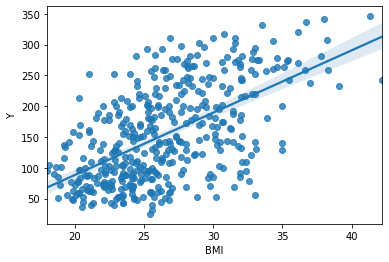

In [ ]:
sns.regplot(x=predictors[0], y=target, data=data_train[[predictors[0], target]])
plt.show()

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
x_test = data_test[predictors]
y_test = data_test[target]
y_pred = model.predict(x_test)
print("Score:", model.score(x_test, y_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 score:", metrics.r2_score(y_test, y_pred))

Score: 0.4890345591616515
MSE: 2521.597070760351
R2 score: 0.4890345591616515


In [ ]:
print("Intercept:", model.intercept_)
for name, coef in zip(predictors, model.coef_):
  print(name, coef)

Intercept: -202.8237181361084
BMI 8.426293227749216
BP 1.4083510337859113


# Naive bayes

## Data preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LeeSeungYun1020/Introduction_To_Data_Science/master/data/tennis_play.csv")
data.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
data.shape

(14, 6)

In [ ]:
columns = {}
label_encoders = {}
for feature in data.columns[1:]:
  label_encoders[feature] = preprocessing.LabelEncoder()
  columns[feature] = label_encoders[feature].fit_transform(data[feature]) # fit과 transform 동시 수행
  print(label_encoders[feature].classes_)
  col = columns[feature]
  lab = label_encoders[feature].inverse_transform(columns[feature])
  print(col)
  print(lab)

['Overcast' 'Rain' 'Sunny']
[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
['Sunny' 'Sunny' 'Overcast' 'Rain' 'Rain' 'Rain' 'Overcast' 'Sunny'
 'Sunny' 'Rain' 'Sunny' 'Overcast' 'Overcast' 'Rain']
['Cool' 'Hot' 'Mild']
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
['Hot' 'Hot' 'Hot' 'Mild' 'Cool' 'Cool' 'Cool' 'Mild' 'Cool' 'Mild' 'Mild'
 'Mild' 'Hot' 'Mild']
['High' 'Normal']
[0 0 0 0 1 1 1 0 1 1 1 0 1 0]
['High' 'High' 'High' 'High' 'Normal' 'Normal' 'Normal' 'High' 'Normal'
 'Normal' 'Normal' 'High' 'Normal' 'High']
['Strong' 'Weak']
[1 0 1 1 1 0 0 1 1 1 0 0 1 0]
['Weak' 'Strong' 'Weak' 'Weak' 'Weak' 'Strong' 'Strong' 'Weak' 'Weak'
 'Weak' 'Strong' 'Strong' 'Weak' 'Strong']
['No' 'Yes']
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


In [ ]:
edata = pd.DataFrame(columns)
edata.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
print(np.where(label_encoders["Outlook"].classes_ == "Sunny")[0][0])
print(np.where(label_encoders["Temperature"].classes_ == "Cool")[0][0])
print(np.where(label_encoders["Humidity"].classes_ == "High")[0][0])
print(np.where(label_encoders["Wind"].classes_ == "Strong")[0][0])

2
0
0
0


In [ ]:
model = naive_bayes.CategoricalNB(alpha=0.001)
model.fit(edata[["Outlook", "Temperature", "Humidity", "Wind"]], edata["PlayTennis"])
print(model.predict([[2, 0, 0, 0]]))
print(model.predict_proba([[2, 0, 0, 0]]))

[0]
[[0.7953405 0.2046595]]


## Logistic regression

선형 회귀, 나이브 베이즈, 로지스틱 회귀 비교

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LeeSeungYun1020/Introduction_To_Data_Science/master/data/study_pass.csv")
data.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


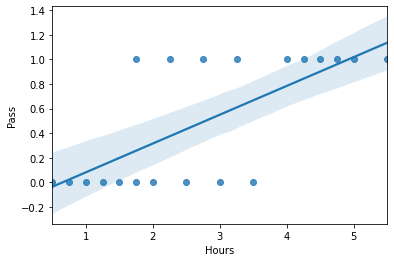

In [ ]:
x = data[["Hours"]]
y = data["Pass"]
sns.regplot(x="Hours", y="Pass", data=data)

In [ ]:
model1 = linear_model.LinearRegression()
model2 = naive_bayes.CategoricalNB(alpha=0.001)
model3 = linear_model.LogisticRegression()

In [ ]:
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(y.values)
print("---------------")
print(model1.predict(x))
y_pred1 = (model1.predict(x) > 0.5).astype(np.int64)
print(y_pred1)
y_pred2 = model2.predict(x)
print(y_pred2)
y_pred3 = model3.predict(x)
print(y_pred3)

[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
---------------
[-0.03663746  0.02201144  0.08066034  0.13930925  0.19795815  0.25660705
  0.25660705  0.31525596  0.37390486  0.43255376  0.49120266  0.54985157
  0.60850047  0.66714937  0.78444718  0.84309608  0.90174499  0.96039389
  1.01904279  1.1363406 ]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print(model2.predict_proba(x)[:,1])
print(model3.predict_proba(x)[:,1])

[4.99500500e-04 4.99500500e-04 2.00119952e-01 2.00119952e-01
 2.00119952e-01 2.00119952e-01 2.00119952e-01 5.00000000e-01
 5.00000000e-01 5.00000000e-01 5.00000000e-01 3.33444370e-01
 3.33444370e-01 3.33444370e-01 9.99750125e-01 9.99750125e-01
 9.99750125e-01 9.99750125e-01 9.99500500e-01 9.99500500e-01]
[0.07141048 0.09295545 0.12015954 0.15397362 0.19519227 0.24425941
 0.24425941 0.30104715 0.36466683 0.43339461 0.50478398 0.57597882
 0.6441537  0.70694435 0.81075008 0.85094629 0.88382827 0.91022165
 0.93108619 0.95999014]


In [ ]:
confusion_matrix1 = pd.crosstab(y, y_pred1, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix2 = pd.crosstab(y, y_pred2, rownames=["Actual"], colnames=["Predicted"])
confusion_matrix3 = pd.crosstab(y, y_pred3, rownames=["Actual"], colnames=["Predicted"])

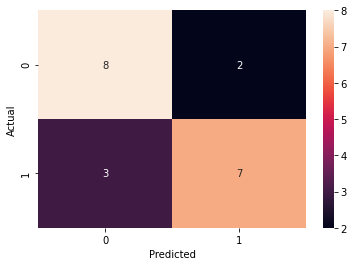

Accuracy (model1): 0.75


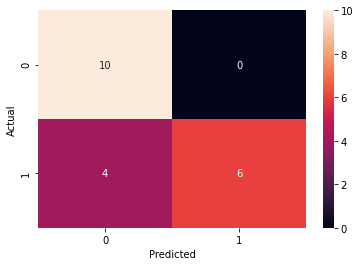

Accuracy (model2): 0.8


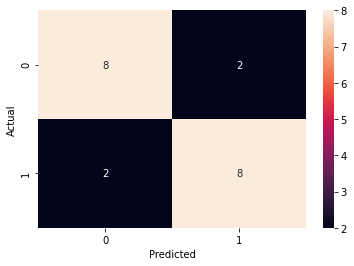

Accuracy (model3): 0.8


In [ ]:
# plt.rcParams['figure.figsize'] = [12, 4]
#fig = plt.figure()

sns.heatmap(confusion_matrix1, annot=True)
plt.show()
print("Accuracy (model1):", metrics.accuracy_score(y, y_pred1))

sns.heatmap(confusion_matrix2, annot=True)
plt.show()
print("Accuracy (model2):", metrics.accuracy_score(y, y_pred2))

sns.heatmap(confusion_matrix3, annot=True)
plt.show()
print("Accuracy (model3):", metrics.accuracy_score(y, y_pred3))

In [ ]:
print("Intercept:", model3.intercept_)
print("Coef:",model3.coef_)

Intercept: [-3.13952411]
Coef: [[1.14860386]]


3시간 공부한 학생의 경우

In [ ]:
1 / (1 + math.pow(math.e, -(model3.intercept_[0] + model3.coef_[0] * 3.0)))

0.5759788210742368

In [ ]:
model3.predict_proba([[3]])

array([[0.42402118, 0.57597882]])

## Train test spirit
바이러스 데이터를 이용하여 로지스틱 회귀 정리

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LeeSeungYun1020/Introduction_To_Data_Science/master/data/virus.csv")
train_data, test_data = train_test_split(data, train_size=0.6, random_state=1)
train_data.shape

(18, 4)

In [ ]:
train_data.head()

,y,x1,x2,x3
2,1,3,5,3
25,1,3,4,5
6,1,3,6,5
18,0,5,8,4
13,1,3,1,2


In [ ]:
predictors = ['x1', 'x2', 'x3']
target = 'y'

x_train = train_data[predictors]
y_train = train_data[target]

x_test = test_data[predictors]
y_test = test_data[target]

In [ ]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9166666666666666

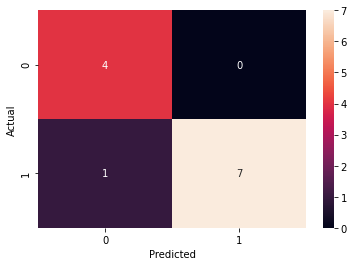

Accuracy: 0.9166666666666666


In [ ]:
y_pred = model.predict(x_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
sns.heatmap(confusion_matrix, annot=True)
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))